<h1>Regresión lineal simple con Dataset de Boston</h1>
<h3>Autor: <b>Jesús Méndez</b></h3>
<h3>Infomración de contacto</h3>
<ul>
    <li>Tel: <b>+52 55-8290-5977</b></li>
    <li>IG: <b>jesusdev.js</b></li>
    <li>Website: <b>https://jesusdev.netlify.app</b></li>
    <li>Github: <b>github.com/jesus105</b></li>
    <li>Fecha: <b>21/06/2020</b></li>
</ul>

<h2>Importamos las librerías</h2>

In [80]:
import numpy as np ##Librería de analisis númerico
from sklearn import datasets, linear_model ##Dataset
import matplotlib.pyplot as plt ##Librería para generar gráficos
from sklearn.model_selection import train_test_split ##Librería para impĺementar regresión lineal                         



<h2>Importamos los datos del dataset e imprimos la información que contiene.</h2>

In [81]:
boston = datasets.load_boston()

print("Características del Dataset:")
print(boston.keys())

Características del Dataset:
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


<h3>Información contenida.</h3>
<p>Dentro de este nosotros podemos comprobar que existen 5 atributos que contienen mucha información úttil del Dataset, dentro de las cuales está:</p>
<ul>
    <l1>1- 
    <b>data:</b> Aquí se almacenan todos los datos de entrada del modelo (W0, W1, W2... Wn)
    </li>
    <l1>2- 
    <b>target:</b> En este apartado están los datos reales de salida del modelo (Y).
    </li>
    <l1>3- 
    <b>featre names:</b> Aquí podemos ver el nombre de la representación de los datos ingresados del modelo (W0 = taxes).
    </li>
    <l1>4- 
    <b>DESCR:</b> Esta es la descripción amplia del Dataset
    </li>
    <l1>5- 
    <b>filname:</b> Esta es la ruta del archivo donde está el Dataset
    </li>
</ul>
<!-- Aquí enumere de manera "Manual" porque los etiquetas de HTML no sirven del todo en el Notebook. LMAO -->

<h3>Imprimimos la descripción del Dataset</h3>

In [82]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

<h3>Comprobación de información</h3>
<p>Ahora nos toca corroborar que los datos del modelo correspondan relamente con los que nos proporciona la descripción.</p>

In [83]:
###Corroboramos la cantidad de datos que nos proporciona el modelo con respecto a lan que nos dice la descripción.

print(boston.data.shape)

(506, 13)


In [84]:
###Donde podemos verificar que es cierto lo que dice la descripción con la realidad, ahora es el turno de los nombres
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


<p>Como podemos observar tenemos muchos datos, pero para nuestro análisis solamente vamos a tomar la columna correspondiente al número de habitaciones con las que cuenta la casa, esta sería la que lleva por nombre “RM”.</p>

<h2>Muestreo de los datos</h2>
<p>Ahora nos toca graficar los datos del precio (target o Y) con respecto a los del numero de habitaciones (RM o X).</p>
<p>Para esto nos apoyaremos de la librería Matplotlib</p>

In [85]:
#Primero ocupando el RM del Dataset definimos nuestro eje de las absisas
X = boston.data[:, np.newaxis, 5]
#Ahora le proporcionamos la información al eje de las ordenadas a partir de los resutados reales
Y = boston.target

<p>Una vez definidos los valores de X y Y, con ayuda de la librería antes mencionada vamos a gráfcar el costo de las viviendas con respecto al promedio del numero promedio de habitaciones por barrio.</p>

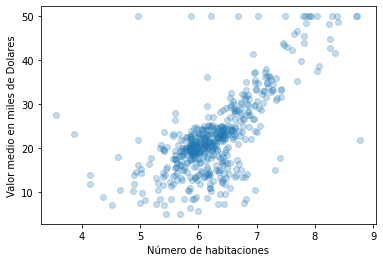

In [86]:
   #Graficamos los datos correspondientes
plt.scatter(X, Y, alpha=0.25)
plt.xlabel('Número de habitaciones')
plt.ylabel('Valor medio en miles de Dolares')
plt.show()

<h3>Analisís de la gráfica</h3>
<p>A simple vista se puede deducir que el modelo de Regresión Lineal que vamos a generar tendrá un error muy alto.</p>
<p>Ahora debemos de separar los datos de la librería train_test_slipt</p>
<p>Para la separación de los datos, vamos a tomar un 20% de los mismos para utilizarlos como prueba una vez que hayamos obtenido el modelo.</p>

<h2>Procesamiento de los datos</h2>

<h3>Separación de los datos para entrenamiento y prueba</h3>
<p>#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos</p>
<p>Seguidamente definimos el algoritmo a utilizar que es el de LinearRegression.</p>


In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) ##Separación de los datos.

lr = linear_model.LinearRegression() ##Declaración del algoritmo a utilizar.

<h3>Entrenamiento y prueba del modelo de regeresión lineal</h3>

<p>Ahora con  los datos que hemos seleccionado para el entrenamiento generaremos los valores de <b>w</b> y <b>b</b> de nuestra recta dentro de la ecuación <b>Y = wX + b</b> para poder predecir valores inexistentes en los datos de entrenamiento.</p>
<p>Posterior a esto con el resto de los datos evaluaremos la eficacia de nuestro modelo ya entrenado.</p>

In [88]:
#Entreno el modelo
lr.fit(X_train, Y_train)

#Realizo una predicción
Y_pred = lr.predict(X_test)

<h3>Codificación de los resultados</h3>
<p>Una vez hecho el entrenamiento tenemos que graficar la recta que hemos generado con el Dataset para poder observar la manera en que esta puede predecir datos.</p>

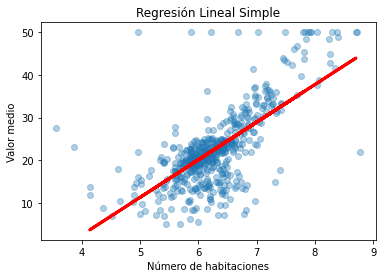

In [89]:
    #Graficamos los datos junto con el modelo
    plt.scatter(X, Y, alpha=0.35)
    plt.plot(X_test, Y_pred, color='red', linewidth=3)
    plt.title('Regresión Lineal Simple')
    plt.xlabel('Número de habitaciones')
    plt.ylabel('Valor medio')
    plt.show()

<h2>Resultados</h2>

In [90]:
print("Ahora podemos saber que una casa con 6 habitaciones tendrá un costo aproximado de " + str(Y_pred[4]) + " miles de dolares")

Ahora podemos saber que una casa con 6 habitaciones tendrá un costo aproximado de 21.23006446653573 miles de dolares


<h3>Y = wX + b</h3>
<p>Ahora solo imprimimos la pendiente y el coeficiente de X (w) y b para poder hacer predicciones de la recta</p>

In [91]:
    print('DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE')
    print()
    print('Valor de la pendiente o coeficiente "w":')
    print(lr.coef_)
    print('Valor de la intersección o coeficiente "b":')
    print(lr.intercept_)
    print()
    print('La ecuación del modelo es igual a:')
    print('y = ', lr.coef_, 'x ', lr.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE

Valor de la pendiente o coeficiente "w":
[8.82093449]
Valor de la intersección o coeficiente "b":
-32.81580115105182

La ecuación del modelo es igual a:
y =  [8.82093449] x  -32.81580115105182


<h3>Uso del modelo</h3>
<p>Ahora podemos hacer una predicción del precio de una vivienda en función al numero de habitaciones como se muestra en el ejemplo.</p>


In [92]:
def precio(habitaciones):
    Y = lr.coef_[0]*habitaciones + lr.intercept_
    return Y

print("El precio de una casa con 6 habitaciones será de:" + str(precio(9)) + " miles de dolares") 

El precio de una casa con 6 habitaciones será de:46.57260925506666 miles de dolares
